In [2]:
import sys
import pyBigWig
print(sys.executable)

/Users/billdeng/anaconda3/envs/de_novo/bin/python


In [3]:
from Bio import SeqIO
import os

First, read and visualize input and output data.

In [4]:
# Get the current working directory
current_dir = os.getcwd()

# Print the current working directory
print(f"The current working directory is: {current_dir}")

The current working directory is: /Users/billdeng/PycharmProjects/genes/source


In [5]:
# Path to FASTA file
fasta_file = '../data/input.fa'

# Initialize an empty dictionary to store sequences
chromosomes = {}

# Using SeqIO.parse to read the FASTA file
for record in SeqIO.parse(fasta_file, "fasta"):
    chromosome_name = record.id
    sequence = str(record.seq)
    chromosomes[chromosome_name] = sequence

# Now, chromosomes dictionary contains all the sequences
# For example, to access the sequence for chromosome 1, you can use:
# chromosome_1_sequence = chromosomes['1']

# If you want to print out the names of all chromosomes read, you can do:
# print("Chromosomes read from the FASTA file:")
# for chromosome in chromosomes.keys():
#     print(chromosome)

In [6]:
for chromosome in chromosomes.keys():
    print(chromosome)
    # print(type(chromosome))  # This will print the type of the chromosome variable

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chrX


In [7]:
print(type(chromosomes[chromosome_name]))

<class 'str'>


In [8]:
chromosome_name = "chr22"  # Just an example, replace it with your actual key
# Print the type of the object and a part of the object (if it's a string, for example)
print(f"Type: {type(chromosomes[chromosome_name])}, Beginning of Content: '{chromosomes[chromosome_name][:10]}'")
print(f"Type: {len(chromosomes[chromosome_name])}, Beginning of Content: '{chromosomes[chromosome_name][1211231:1211252]}'")

Type: <class 'str'>, Beginning of Content: 'NNNNNNNNNN'
Type: 51304566, Beginning of Content: 'NNNNNNNNNNNNNNNNNNNNN'


Use the de novo environment.

In [9]:
import numpy as np
import tensorflow

In [10]:
from keras import Model
from keras import backend as K
from keras.layers import Conv2D

from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import Input

In [11]:
# from janggu import *

In [12]:
from janggu.data import Bioseq
from janggu.data import Cover
from janggu.data import ReduceDim
from janggu.layers import DnaConv2D
from sklearn.metrics import roc_auc_score

In [13]:
from pkg_resources import resource_filename

/Users/billdeng/PycharmProjects/genes/janggu/data/visualization.py:58: FutureWarning: Convert the Dataset object to proper Track objects. In the future, only Track objects will be supported.
  warnings.warn('Convert the Dataset object to proper Track objects.'
/Users/billdeng/PycharmProjects/genes/janggu/data/visualization.py:82: FutureWarning: Convert the Dataset object to proper Track objects. In the future, only Track objects will be supported.
  warnings.warn('Convert the Dataset object to proper Track objects.'
/Users/billdeng/PycharmProjects/genes/janggu/data/visualization.py:324: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks)


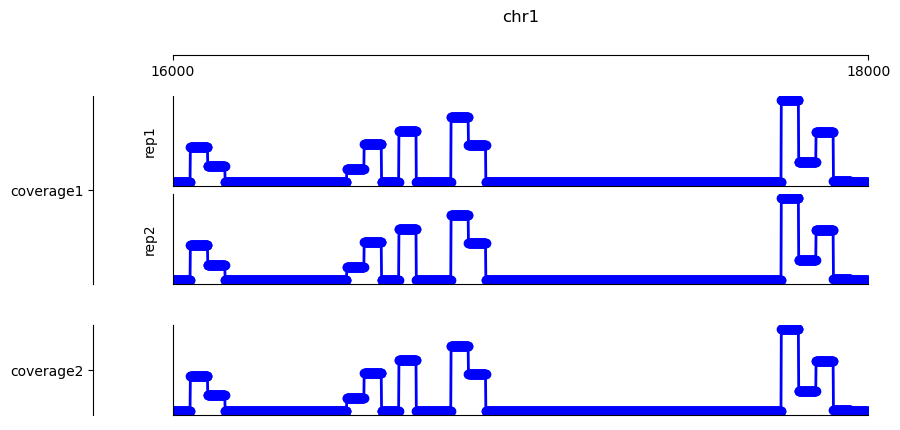

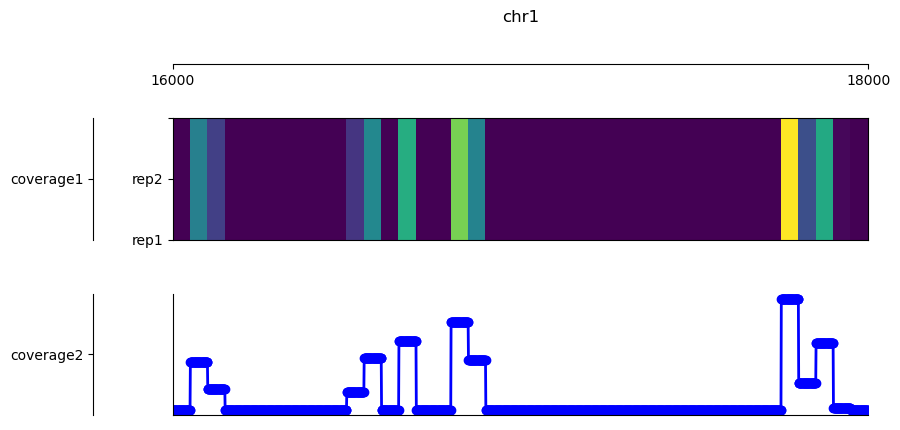

In [14]:
from janggu.data import plotGenomeTrack

from janggu.data import Cover
from janggu.data import HeatTrack
from janggu.data import LineTrack

roi = resource_filename('janggu',
                        'resources/sample.bed')

bw_file = resource_filename('janggu',
                            'resources/sample.bw')

cover = Cover.create_from_bigwig('coverage1',
                                 bigwigfiles=[bw_file] * 2,
                                 conditions=['rep1', 'rep2'],
                                 roi=roi,
                                 binsize=200,
                                 stepsize=200,
                                 resolution=50)

cover2 = Cover.create_from_bigwig('coverage2',
                                  bigwigfiles=bw_file,
                                  roi=roi,
                                  binsize=200,
                                  stepsize=200,
                                  resolution=50)

plotGenomeTrack([cover, cover2],
                'chr1', 16000, 18000).savefig('coverage.png')

plotGenomeTrack([HeatTrack(cover), LineTrack(cover2)],
                'chr1', 16000, 18000).savefig('coverage2.png')

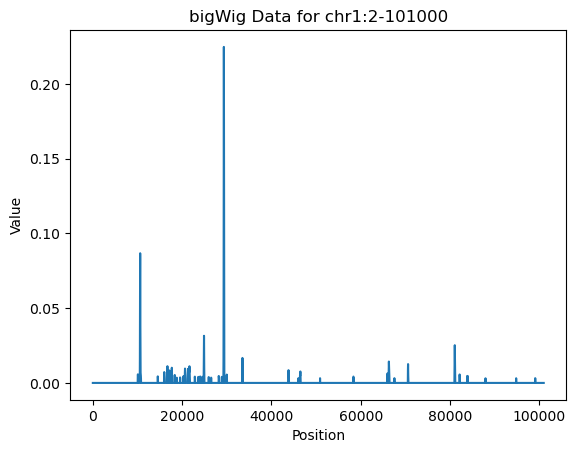

In [15]:
import matplotlib.pyplot as plt
# Open a bigWig file
bw = pyBigWig.open("../data/aorta.bw")

# Define the region of interest
chrom = "chr1"
start = 2
end = 101000

# Retrieve values for the region
values = bw.values(chrom, start, end)

# Close the bigWig file
bw.close()

# Plot the values
plt.plot(values)
plt.xlabel("Position")
plt.ylabel("Value")
plt.title(f"bigWig Data for {chrom}:{start}-{end}")
plt.show()

### Prepare Dataset

In [16]:
from janggu.data import Bioseq
from janggu.data import Cover
from janggu.data import ReduceDim
from janggu.data import SqueezeDim

In [17]:
raw_label_aorta = resource_filename('janggu', '../data/aorta.bw')

/var/folders/mw/2gycpkq57p97cpwvmwvm69m00000gn/T/ipykernel_39998/1755127643.py:1: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  raw_label_aorta = resource_filename('janggu', '../data/aorta.bw')


We pseudo-label our train set and test set here, since it is impossible to wait for the BigWig file to split into
train set and test set. However, I have coded a split function in jupyter notebook, that when someone has more time,
could use my split function to split the BigWig data into 1_22 chromosomes and 23 chromosome. To change the whole machine
learning process, simply change the path directory to load the actually train set and test set.

For a time-efficient perspective, we will build machine learning models with pseud dataset split. Note that good results
might be due to overfitting, instead of actually capturing the feature dimensions.

But if you actually think about the number of parameters, it is actually not that. It is not going to be overfitting.

In [18]:
label_aorta = ReduceDim(Cover.create_from_bigwig('aorta_bigwig',
                                 bigwigfiles=raw_label_aorta,
                                 roi=roi,
                                 binsize=200,
                                 resolution=None,
                                 collapser='mean'))

In [19]:
test_aorta = ReduceDim(Cover.create_from_bigwig('aorta_bigwig',
                                 bigwigfiles=raw_label_aorta,
                                 roi=roi,
                                 binsize=200,
                                 resolution=None,
                                 collapser='mean'))

In [20]:
raw_label_artery = resource_filename('janggu', '../data/artery.bw')

/var/folders/mw/2gycpkq57p97cpwvmwvm69m00000gn/T/ipykernel_39998/466259674.py:1: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  raw_label_artery = resource_filename('janggu', '../data/artery.bw')


In [21]:
label_artery = ReduceDim(Cover.create_from_bigwig('artery_bigwig',
                                 bigwigfiles=raw_label_aorta,
                                 roi=roi,
                                 binsize=200,
                                 resolution=None,
                                 collapser='mean'))

In [22]:
test_artery = ReduceDim(Cover.create_from_bigwig('artery_bigwig',
                                 bigwigfiles=raw_label_aorta,
                                 roi=roi,
                                 binsize=200,
                                 resolution=None,
                                 collapser='mean'))

In [23]:
raw_label_pulmonic = resource_filename('janggu', '../data/pulmonic.bw')

/var/folders/mw/2gycpkq57p97cpwvmwvm69m00000gn/T/ipykernel_39998/1131512290.py:1: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  raw_label_pulmonic = resource_filename('janggu', '../data/pulmonic.bw')


In [24]:
label_pulmonic = ReduceDim(Cover.create_from_bigwig('pulmonic_bigwig',
                                 bigwigfiles=raw_label_pulmonic,
                                 roi=roi,
                                 binsize=200,
                                 resolution=None,
                                 collapser='mean'))

In [25]:
test_pulmonic = ReduceDim(Cover.create_from_bigwig('pulmonic_bigwig',
                                 bigwigfiles=raw_label_pulmonic,
                                 roi=roi,
                                 binsize=200,
                                 resolution=200,
                                 collapser='mean'))

In [26]:
print(test_pulmonic.shape)

(100, 1)


In [27]:
print(type(label_aorta))

<class 'janggu.data.nparr.ReduceDim'>


In [28]:
from janggu import Janggu

In [29]:
# fig = plotGenomeTrack([LineTrack(label_aorta)], 'chr1', 2, 290000)

In [30]:
print(label_aorta.shape)

(100, 1)


Prepare genome dataset

In [31]:
genome_X = resource_filename('janggu', '../data/input.fa')

/var/folders/mw/2gycpkq57p97cpwvmwvm69m00000gn/T/ipykernel_39998/3197743970.py:1: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  genome_X = resource_filename('janggu', '../data/input.fa')


In [32]:
JANGGU_OUTPUT = os.getcwd()
print(JANGGU_OUTPUT)

/Users/billdeng/PycharmProjects/genes/source


In [33]:
# Training input and labels are purely defined genomic coordinates
DNA = Bioseq.create_from_refgenome('dna', refgenome=genome_X,
                                   roi=roi,
                                   binsize=200,
                                   cache=True)

environment variable JANGGU_OUTPUT not set. Will use JANGGU_OUTPUT=/Users/billdeng/janggu_results


In [34]:
print(type(DNA))

<class 'janggu.data.dna.Bioseq'>


In [35]:
from keras.layers import Input
from keras.layers import Dense

from janggu import Janggu

In [36]:
print(DNA.shape)

(100, 200, 1, 4)


In [37]:
from keras.layers import Input, Dense, LSTM, Flatten

In [38]:
in_ = Input(shape=(10,), name='dna')
layer = Dense(3)(in_)
output = Dense(1, activation='sigmoid',
               name='out')(layer)

In [39]:
# Instantiate model name.
model = Janggu(inputs=in_, outputs=output)
model.summary()

Generated model-id: '55fe7e2aa742bb3f28f7dd6f5fc4f9bd'
Model: "janggu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dna (InputLayer)            [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3)                 33        
                                                                 
 out (Dense)                 (None, 1)                 4         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
#model.compile(optimizer='adadelta', loss='binary_crossentropy',
              # metrics=['acc'])
#model.fit(DNA,label_pulmonic,epochs=100)

# DNACon2D Model

In [50]:
from keras.layers import Conv2D
from keras.layers import GlobalAveragePooling2D
from janggu import inputlayer, outputdense
from janggu import outputconv
from janggu import DnaConv2D
from janggu.data import ReduceDim

@inputlayer
@outputdense('sigmoid')
def DnaCon2D_model(inputs, inp, oup, params):
    with inputs.use('dna') as layer:
        # The DnaConv2D wrapper can be used with Conv2D
        # to scan both DNA strands with the weight matrices.
        layer = DnaConv2D(Conv2D(params[0], (params[1], 1),
                                 activation=params[2]))(layer)
    output = GlobalAveragePooling2D(name='motif')(layer)
    return inputs, output

## Pulmonic Label Training

In [51]:
pulmonic_model = Janggu.create(template=DnaCon2D_model,
                      modelparams=(30, 15, 'relu'),
                      inputs=DNA, outputs=label_pulmonic)
pulmonic_model.summary()

Generated model-id: 'c58ad9689d948403da5c9fac41668737'
Model: "janggu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dna (InputLayer)            [(None, 200, 1, 4)]       0         
                                                                 
 dna_conv2d_4 (DnaConv2D)    (None, 186, 1, 30)        1830      
                                                                 
 motif (GlobalAveragePoolin  (None, 30)                0         
 g2D)                                                            
                                                                 
 pulmonic_bigwig (Dense)     (None, 1)                 31        
                                                                 
Total params: 1861 (7.27 KB)
Trainable params: 1861 (7.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
pulmonic_model.compile(optimizer='adadelta', loss='binary_crossentropy',
              metrics=['acc'])

In [53]:
pulmonic_model.fit(DNA,label_pulmonic,epochs=100)

Epoch 1/100


/Users/billdeng/PycharmProjects/genes/janggu/model.py:575: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = self.kerasmodel.fit_generator(


4/4 [==============================] - 1s 14ms/step - loss: 0.6063 - acc: 0.3000
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6062 - acc: 0.3000
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6061 - acc: 0.3000
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6060 - acc: 0.3000
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6059 - acc: 0.3000
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6057 - acc: 0.3000
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6056 - acc: 0.3000
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6055 - acc: 0.3000
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6053 - acc: 0.3000
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6052 - acc: 0.3000
Epoch 11/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6051 - acc:

/Users/billdeng/anaconda3/envs/de_novo/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## aorta Label Training


In [56]:
aorta_model = Janggu.create(template=DnaCon2D_model,
                      modelparams=(30, 15, 'relu'),
                      inputs=DNA, outputs=label_aorta)
aorta_model.summary()

Generated model-id: '82c05b0b72c5f81b96b53804fde971fe'
Model: "janggu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dna (InputLayer)            [(None, 200, 1, 4)]       0         
                                                                 
 dna_conv2d_6 (DnaConv2D)    (None, 186, 1, 30)        1830      
                                                                 
 motif (GlobalAveragePoolin  (None, 30)                0         
 g2D)                                                            
                                                                 
 aorta_bigwig (Dense)        (None, 1)                 31        
                                                                 
Total params: 1861 (7.27 KB)
Trainable params: 1861 (7.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
aorta_model.compile(optimizer='adadelta', loss='binary_crossentropy',
              metrics=['acc'])
aorta_model.fit(DNA,label_aorta,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 9ms/step - loss: 0.8098 - acc: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.8096 - acc: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8095 - acc: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.8094 - acc: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8092 - acc: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.8091 - acc: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8090 - acc: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8088 - acc: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8087 - acc: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8086 - acc: 0.0000e+00
Epoch 11/100
4/4 [===============

/Users/billdeng/anaconda3/envs/de_novo/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


artery Label Training

In [59]:
artery_model = Janggu.create(template=DnaCon2D_model,
                      modelparams=(30, 15, 'relu'),
                      inputs=DNA, outputs=label_artery)
artery_model.summary()

Generated model-id: '0ca3d5cf5eb65680e7e66430f4cd4d88'
Model: "janggu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dna (InputLayer)            [(None, 200, 1, 4)]       0         
                                                                 
 dna_conv2d_8 (DnaConv2D)    (None, 186, 1, 30)        1830      
                                                                 
 motif (GlobalAveragePoolin  (None, 30)                0         
 g2D)                                                            
                                                                 
 artery_bigwig (Dense)       (None, 1)                 31        
                                                                 
Total params: 1861 (7.27 KB)
Trainable params: 1861 (7.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
artery_model.compile(optimizer='adadelta', loss='binary_crossentropy',
              metrics=['acc'])
artery_model.fit(DNA,label_artery,epochs=100)

Epoch 1/100


/Users/billdeng/PycharmProjects/genes/janggu/model.py:575: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = self.kerasmodel.fit_generator(


4/4 [==============================] - 1s 7ms/step - loss: 0.5983 - acc: 0.6900
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5981 - acc: 0.6900
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5980 - acc: 0.6900
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5979 - acc: 0.6900
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5978 - acc: 0.6900
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5977 - acc: 0.6900
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5976 - acc: 0.6900
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5974 - acc: 0.6900
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5973 - acc: 0.6900
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5972 - acc: 0.6900
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5971 - ac

/Users/billdeng/anaconda3/envs/de_novo/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## DNACon2D Models Eval

In [64]:
loss ,accuracy = pulmonic_model.evaluate(DNA, test_pulmonic)
print('loss', loss)
print('accuracy', accuracy)

loss 0.591599702835083
accuracy 0.30000001192092896


/Users/billdeng/PycharmProjects/genes/janggu/model.py:789: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  values = self.kerasmodel.evaluate_generator(
/Users/billdeng/PycharmProjects/genes/janggu/model.py:808: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = self.kerasmodel.predict_generator(jseq, steps=steps,


In [65]:
loss ,accuracy = aorta_model.evaluate(DNA, test_aorta)
print('loss', loss)
print('accuracy', accuracy)

/Users/billdeng/PycharmProjects/genes/janggu/model.py:789: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  values = self.kerasmodel.evaluate_generator(
/Users/billdeng/PycharmProjects/genes/janggu/model.py:808: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = self.kerasmodel.predict_generator(jseq, steps=steps,


loss 0.7944567203521729
accuracy 0.0


In [66]:
loss ,accuracy = artery_model.evaluate(DNA, test_artery)
print('loss', loss)
print('accuracy', accuracy)

/Users/billdeng/PycharmProjects/genes/janggu/model.py:789: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  values = self.kerasmodel.evaluate_generator(
/Users/billdeng/PycharmProjects/genes/janggu/model.py:808: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = self.kerasmodel.predict_generator(jseq, steps=steps,


loss 0.5845406651496887
accuracy 0.6899999976158142


# Single-layer Net

In [45]:
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import GlobalAveragePooling2D
from janggu import inputlayer, outputdense
from janggu import outputconv
from janggu import DnaConv2D
from janggu.data import ReduceDim
@inputlayer
@outputdense('sigmoid')
def Conv1D_model(inputs, inp, oup, params):
    with inputs.use('dna') as layer:
        # The DnaConv2D wrapper can be used with Conv2D
        # to scan both DNA strands with the weight matrices.
        layer = Conv1D(1, 1, activation='relu')(layer)
    output = GlobalAveragePooling2D(name='motif')(layer)
    return inputs, output

In [46]:
pulmonic_model = Janggu.create(template=Conv1D_model,
                      inputs=DNA, outputs=label_pulmonic)
pulmonic_model.summary()

Generated model-id: '3d303ccdfa2e087f0f3a19f53ceee58b'
Model: "janggu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dna (InputLayer)            [(None, 200, 1, 4)]       0         
                                                                 
 conv1d_1 (Conv1D)           (None, 200, 1, 1)         5         
                                                                 
 motif (GlobalAveragePoolin  (None, 1)                 0         
 g2D)                                                            
                                                                 
 pulmonic_bigwig (Dense)     (None, 1)                 2         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
pulmonic_model.fit(DNA,label_pulmonic,epochs=100)

Epoch 1/100


/Users/billdeng/PycharmProjects/genes/janggu/model.py:575: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = self.kerasmodel.fit_generator(


4/4 [==============================] - 1s 6ms/step - loss: 0.9623 - acc: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9623 - acc: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9623 - acc: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9623 - acc: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9623 - acc: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9623 - acc: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9623 - acc: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9623 - acc: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9622 - acc: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9622 - acc: 0.0000e+00
Epoch 11/100
4/4 [==============================] -

/Users/billdeng/anaconda3/envs/de_novo/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
aorta_model = Janggu.create(template=Conv1D_model,
                      modelparams=(30, 15, 'relu'),
                      inputs=DNA, outputs=label_aorta)
aorta_model.summary()

Generated model-id: 'a860d0a5548d6ddc7333e368563da556'
Model: "janggu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dna (InputLayer)            [(None, 200, 1, 4)]       0         
                                                                 
 conv1d_3 (Conv1D)           (None, 200, 1, 1)         5         
                                                                 
 motif (GlobalAveragePoolin  (None, 1)                 0         
 g2D)                                                            
                                                                 
 aorta_bigwig (Dense)        (None, 1)                 2         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
aorta_model.compile(optimizer='adadelta', loss='binary_crossentropy',
              metrics=['acc'])
aorta_model.fit(DNA,label_aorta,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 0.4945 - acc: 0.6900
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4945 - acc: 0.6900
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4945 - acc: 0.6900
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4945 - acc: 0.6900
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4945 - acc: 0.6900
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4944 - acc: 0.6900
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4944 - acc: 0.6900
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4944 - acc: 0.6900
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4944 - acc: 0.6900
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4944 - acc: 0.6900
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4944 

/Users/billdeng/anaconda3/envs/de_novo/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
